/tmp/ipykernel_162946/1369901006.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='compound', y='clean_url', data=top_n_count_compound_df, palette='pastel', ax=axes[0])


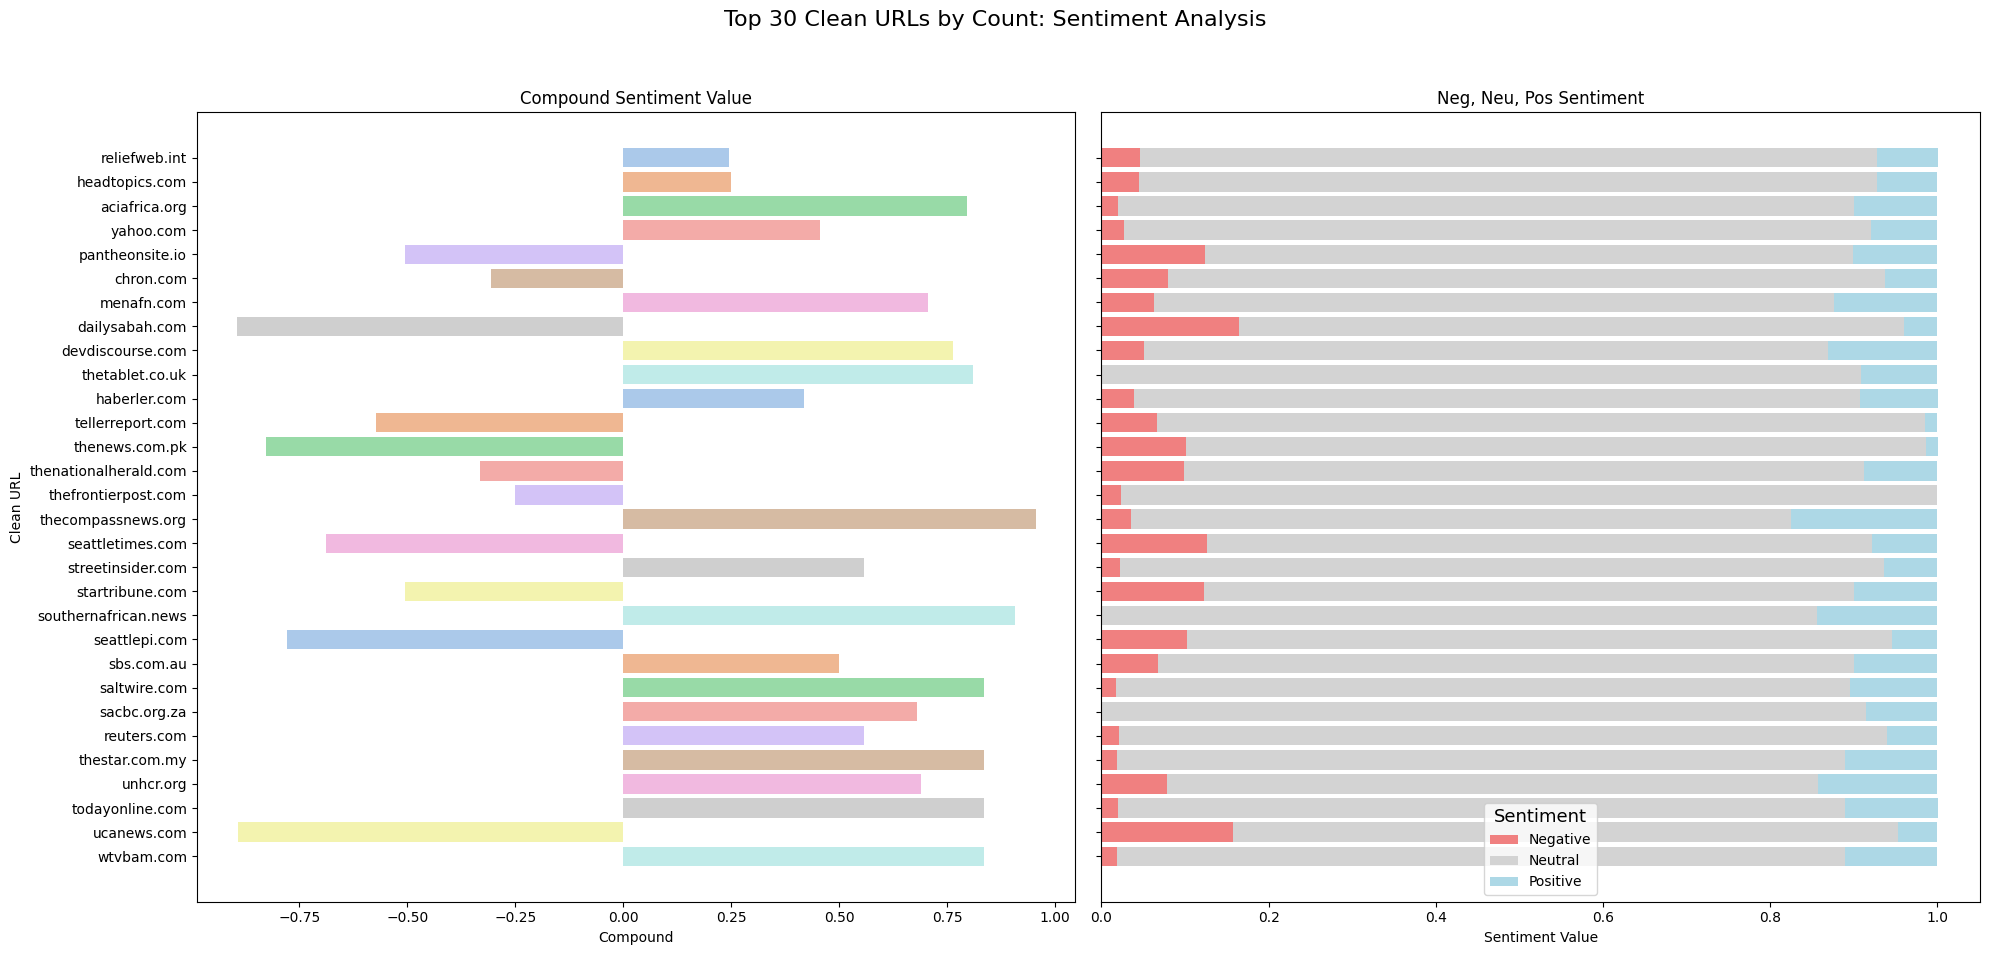

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and convert 'published_date' to datetime
df = pd.read_csv('news_analysis.csv')
df['published_date'] = pd.to_datetime(df['published_date'])

def plot_top_n_sentiments(df, N):
    # Load the dataset
    
    # Aggregate by 'clean_url' for compound sentiment and count
    compound_count_agg_df = df.groupby('clean_url').agg({'compound': 'mean', 'Unnamed: 0': 'count'}).reset_index()
    compound_count_agg_df.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
    
    # Get the top N URLs by count
    top_n_count_compound_df = compound_count_agg_df.sort_values(by='count', ascending=False).head(N)
    
    # Aggregate by 'clean_url' for neg, neu, pos sentiment and count
    sentiment_count_agg_df = df.groupby('clean_url').agg({'neg': 'mean', 'neu': 'mean', 'pos': 'mean', 'Unnamed: 0': 'count'}).reset_index()
    sentiment_count_agg_df.rename(columns={'Unnamed: 0': 'count'}, inplace=True)
    
    # Get the top N URLs by count
    top_n_count_sentiment_df = sentiment_count_agg_df.sort_values(by='count', ascending=False).head(N)
    
    # Create the combined plots
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)
    
    # First subplot for Compound Sentiment
    sns.barplot(x='compound', y='clean_url', data=top_n_count_compound_df, palette='pastel', ax=axes[0])
    axes[0].set_title('Compound Sentiment Value')
    axes[0].set_xlabel('Compound')
    axes[0].set_ylabel('Clean URL')
    
    # Second subplot for Neg, Neu, Pos Sentiment
    axes[1].barh(top_n_count_sentiment_df['clean_url'], top_n_count_sentiment_df['neg'], color='lightcoral', label='Negative')
    axes[1].barh(top_n_count_sentiment_df['clean_url'], top_n_count_sentiment_df['neu'], color='lightgrey', label='Neutral', left=top_n_count_sentiment_df['neg'])
    axes[1].barh(top_n_count_sentiment_df['clean_url'], top_n_count_sentiment_df['pos'], color='lightblue', label='Positive', left=top_n_count_sentiment_df['neg'] + top_n_count_sentiment_df['neu'])
    axes[1].set_title('Neg, Neu, Pos Sentiment')
    axes[1].set_xlabel('Sentiment Value')
    axes[1].legend(title='Sentiment', title_fontsize='13')
    
    # Overall title
    fig.suptitle(f'Top {N} Clean URLs by Count: Sentiment Analysis', fontsize=16)
    
    # Show the combined plot
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage
plot_top_n_sentiments(df, N=30)


/tmp/ipykernel_162946/462717334.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Entity Type', data=entity_type_df, palette='pastel', ax=axes[0])
/tmp/ipykernel_162946/462717334.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='index', data=top_n_entity_df, palette='pastel', ax=axes[1])


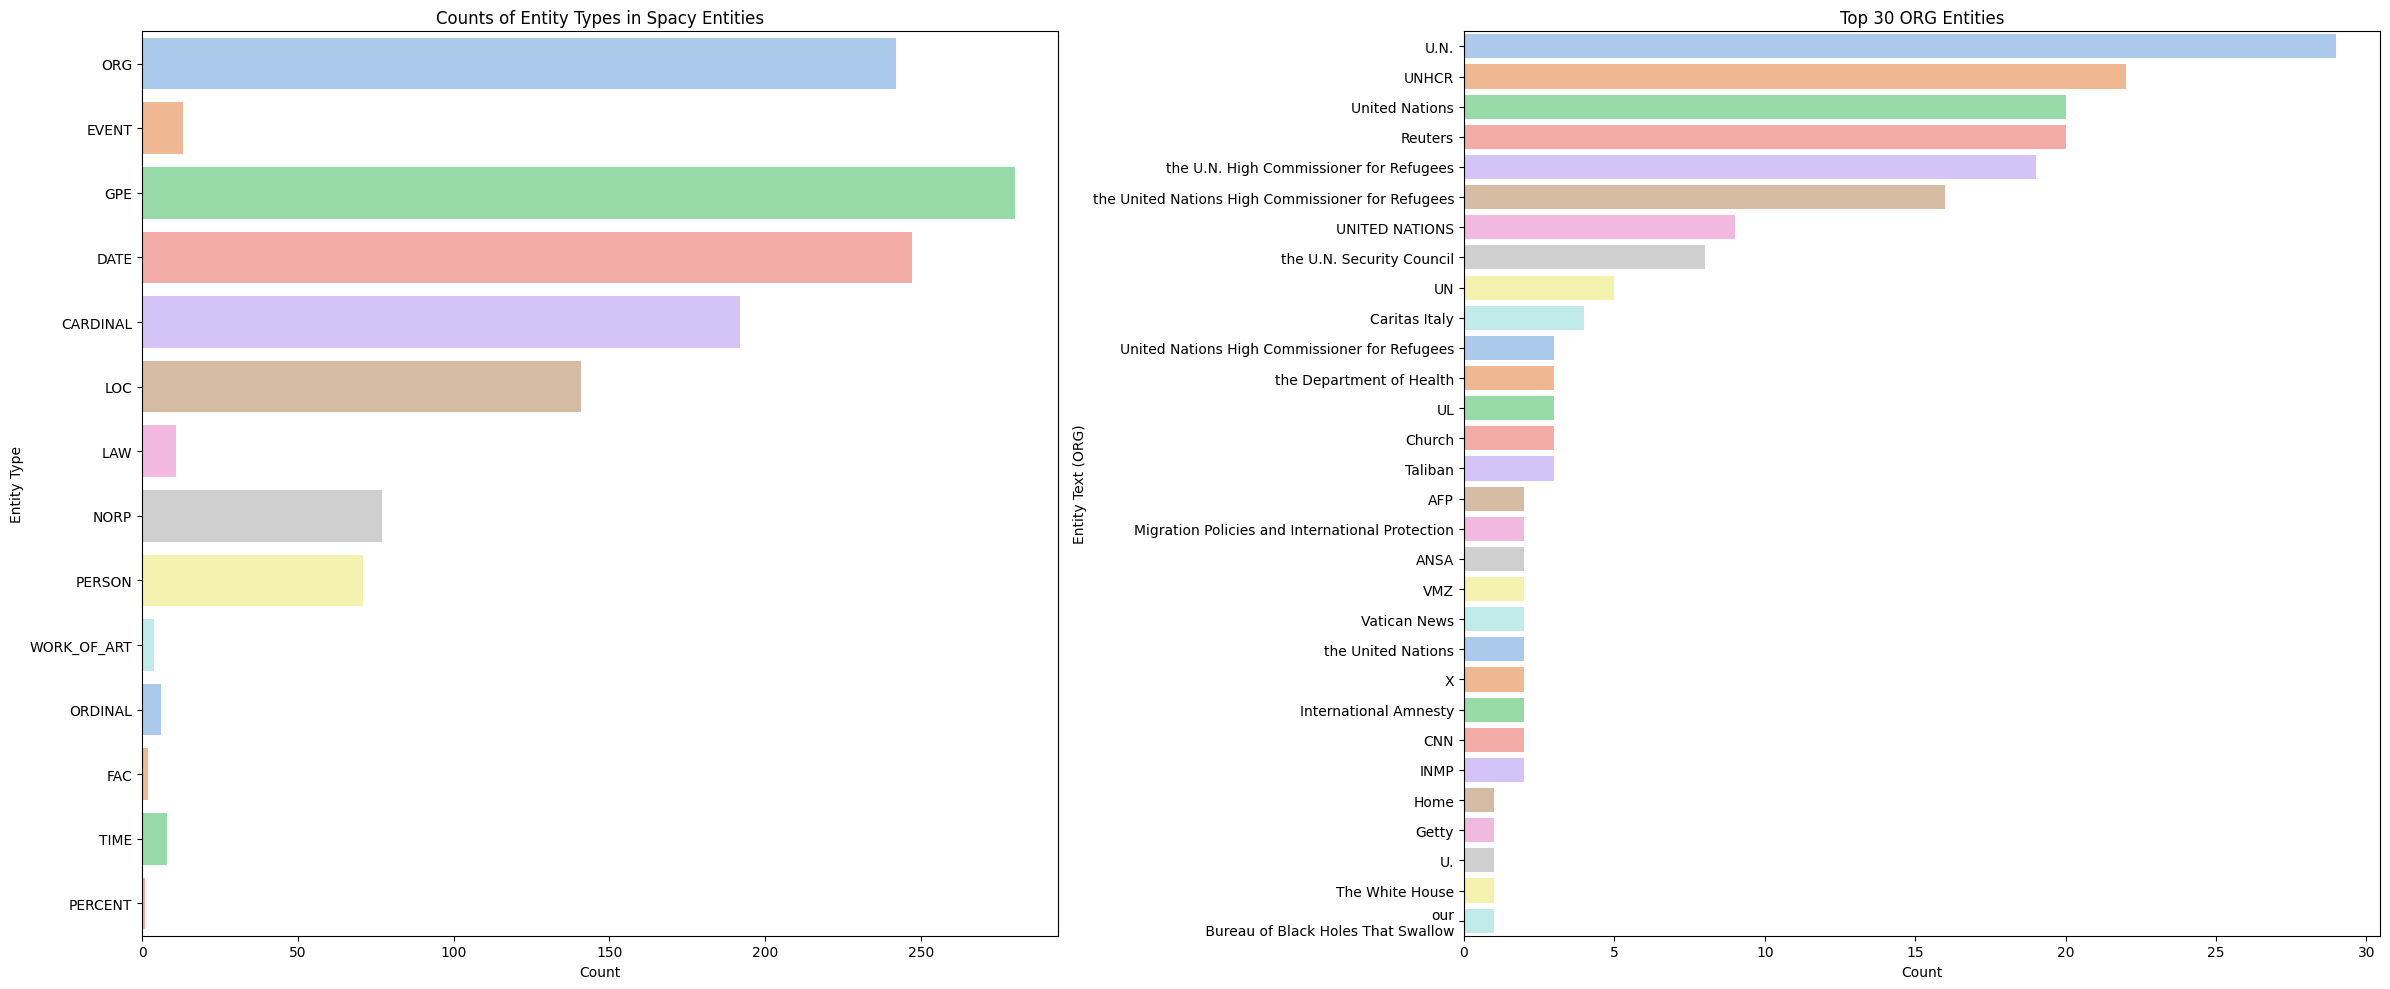

In [27]:
from collections import Counter
def plot_entity_types(df):
    entity_type_counter = Counter()
    for entities in df['spacy_entities']:
        for entity in entities:
            entity_type_counter[entity['ent_type']] += 1
    entity_type_df = pd.DataFrame.from_dict(entity_type_counter, orient='index', columns=['Count']).reset_index()
    entity_type_df.rename(columns={'index': 'Entity Type'}, inplace=True)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='Entity Type', data=entity_type_df, palette='pastel')
    plt.xlabel('Count')
    plt.ylabel('Entity Type')
    plt.title('Counts of Entity Types in Spacy Entities')
    plt.show()

def plot_top_n_entities(df, ent_type='ORG', N=30):
    entity_counter = Counter()
    for idx, row in df.iterrows():
        clean_url = row['clean_url'].lower()
        for entity in row['spacy_entities']:
            if entity['ent_type'] == ent_type and entity['ent_text'].lower() not in clean_url:
                entity_counter[entity['ent_text']] += 1
    entity_df = pd.DataFrame.from_dict(entity_counter, orient='index', columns=['Count']).reset_index()
    top_n_entity_df = entity_df.sort_values(by='Count', ascending=False).head(N)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Count', y='index', data=top_n_entity_df, palette='pastel')
    plt.xlabel('Count')
    plt.ylabel(f'Entity Text ({ent_type})')
    plt.title(f'Top {N} {ent_type} Entities')
    plt.show()

def plot_entity_types_and_top_n_entities(df, ent_type='ORG', N=30):
    # Initialize counters and DataFrames
    entity_type_counter = Counter()
    entity_counter = Counter()
    
    for entities in df['spacy_entities']:
        for entity in entities:
            entity_type_counter[entity['ent_type']] += 1
            
            if entity['ent_type'] == ent_type and entity['ent_text'].lower() not in df['clean_url'].str.lower().values:
                entity_counter[entity['ent_text']] += 1
                
    entity_type_df = pd.DataFrame.from_dict(entity_type_counter, orient='index', columns=['Count']).reset_index()
    entity_type_df.rename(columns={'index': 'Entity Type'}, inplace=True)
    
    entity_df = pd.DataFrame.from_dict(entity_counter, orient='index', columns=['Count']).reset_index()
    top_n_entity_df = entity_df.sort_values(by='Count', ascending=False).head(N)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(24, 10))
    
    # Plot entity types
    sns.barplot(x='Count', y='Entity Type', data=entity_type_df, palette='pastel', ax=axes[0])
    axes[0].set_xlabel('Count')
    axes[0].set_ylabel('Entity Type')
    axes[0].set_title('Counts of Entity Types in Spacy Entities')
    
    # Plot top N entities of a given type
    sns.barplot(x='Count', y='index', data=top_n_entity_df, palette='pastel', ax=axes[1])
    axes[1].set_xlabel('Count')
    axes[1].set_ylabel(f'Entity Text ({ent_type})')
    axes[1].set_title(f'Top {N} {ent_type} Entities')
    
    plt.tight_layout()
    plt.show()

# Example usage
# Make sure to replace 'df' with your actual DataFrame containing the data
plot_entity_types_and_top_n_entities(df, ent_type='ORG', N=30)

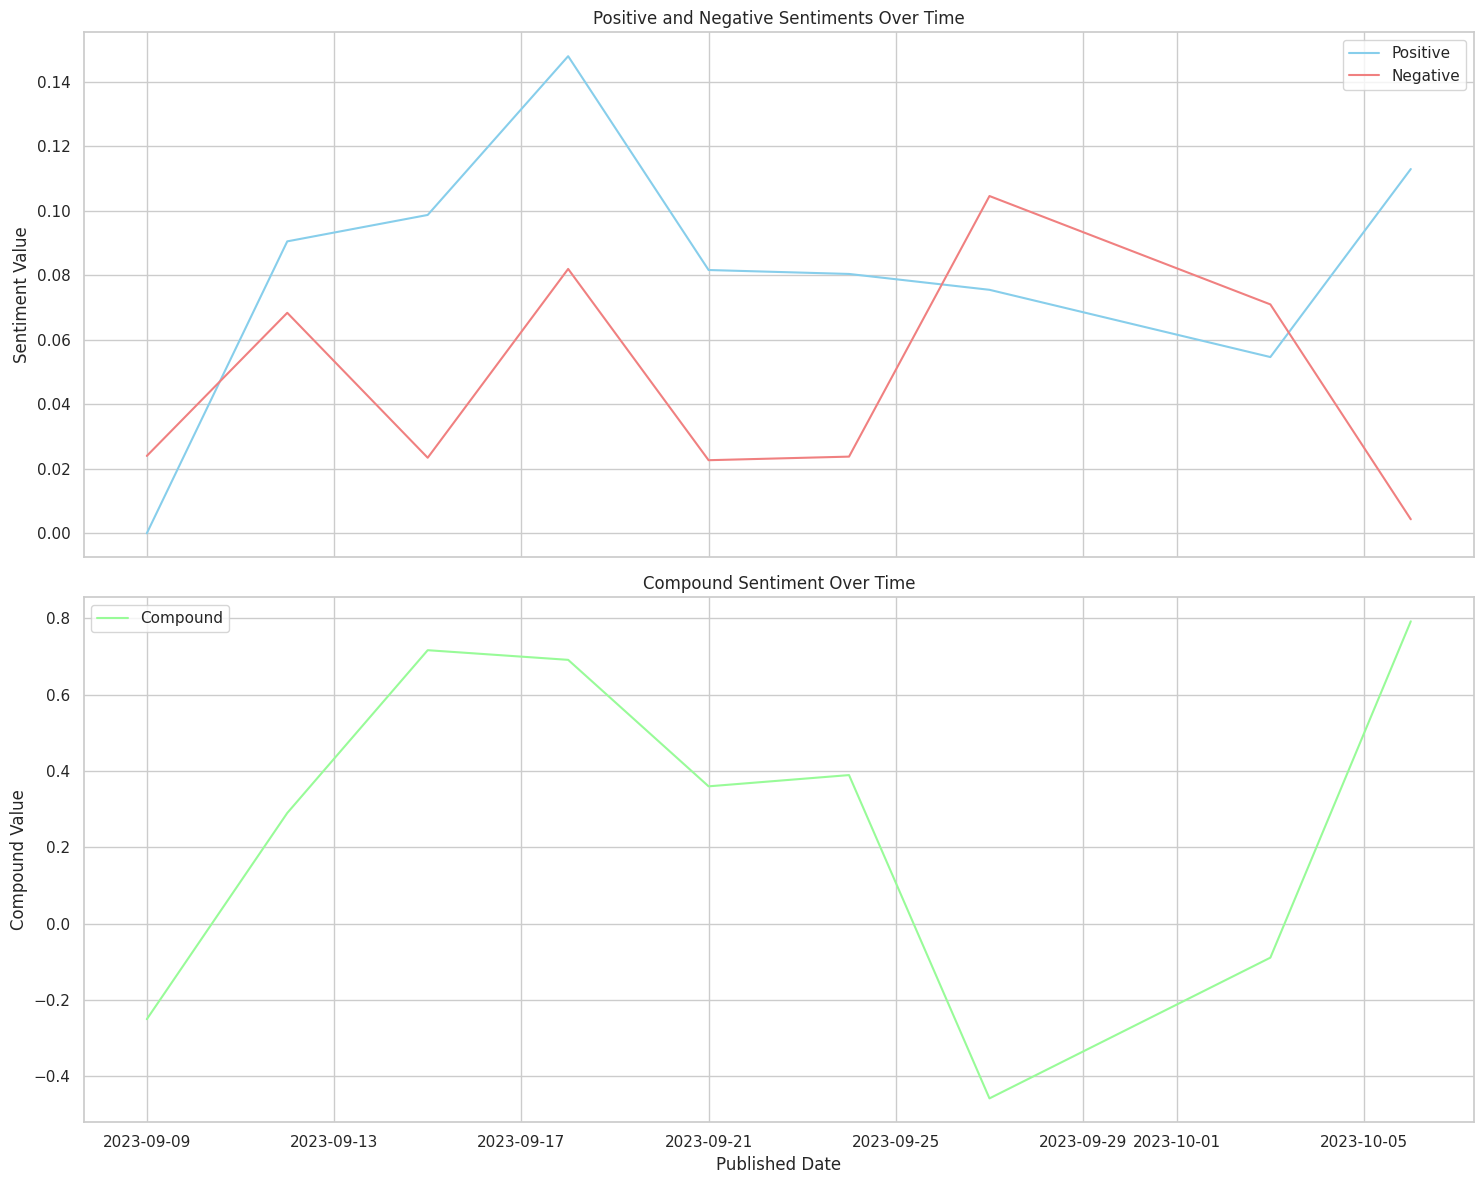

In [29]:

df['published_date'] = pd.to_datetime(df['published_date'])

def plot_sentiments_with_pastel_lines(df, interval='3D'):
    # Set seaborn aesthetics
    sns.set(style="whitegrid")
    
    # Convert 'published_date' to datetime and resample
    df['published_date'] = pd.to_datetime(df['published_date'])
    df_resampled = df.resample(interval, on='published_date').agg({'pos': 'mean', 'neg': 'mean', 'compound': 'mean'}).reset_index()
    
    # Create subplots
    fig, axes = plt.subplots(2, 1, figsize=(15, 12), sharex=True)
    
    # Plot positive and negative sentiments
    sns.lineplot(x='published_date', y='pos', data=df_resampled, ax=axes[0], label='Positive', color='skyblue')
    sns.lineplot(x='published_date', y='neg', data=df_resampled, ax=axes[0], label='Negative', color='lightcoral')
    axes[0].set_title('Positive and Negative Sentiments Over Time')
    axes[0].set_ylabel('Sentiment Value')
    
    # Plot compound sentiment
    sns.lineplot(x='published_date', y='compound', data=df_resampled, ax=axes[1], label='Compound', color='palegreen')
    axes[1].set_title('Compound Sentiment Over Time')
    axes[1].set_xlabel('Published Date')
    axes[1].set_ylabel('Compound Value')
    
    plt.tight_layout()
    plt.show()

# Example usage: Replace 'df' with your DataFrame
plot_sentiments_with_pastel_lines(df, interval='3D')
